# Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')



# Load Dataset 

In [5]:
data = pd.read_csv('breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Diagnosis (M = malignant, B = benign)

In [3]:
data.shape

(569, 33)

In [6]:
#Get Target data 
y = data['diagnosis']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['id','diagnosis','Unnamed: 32'], axis = 1)

# Check X Variables

In [ ]:

#We do not have any missing values

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Check size of data
X.shape

(569, 30)

In [7]:
xtr,xte,ytr,yte = train_test_split(X,y , test_size = 0.20 , random_state = 4)
print(xtr.shape)
print(xte.shape)


(455, 30)
(114, 30)


# Build Logistic Regression Model with Defulat Hyperparameters

Training Accuracy - : 0.9560439560439561
Testing Accuracy - : 0.8771929824561403


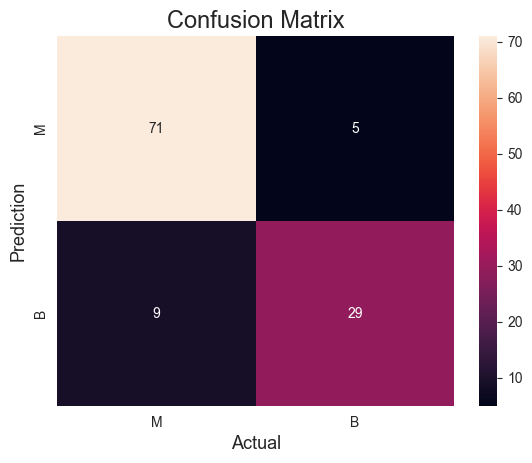

Accuracy: 0.8771929824561403
Precision: 0.9342105263157895
Recall: 0.8875
F1 Score: 0.9102564102564101


In [8]:
clf = LogisticRegression(penalty = 'l2', C = 1)
clf.fit(xtr,ytr)
pred = clf.predict(xte)
print (f'Training Accuracy - : {clf.score(xtr,ytr)}')
print (f'Testing Accuracy - : {clf.score(xte,yte)}')
cm_with_C_1 = confusion_matrix(pred, yte)

 
sns.heatmap(cm_with_C_1,
            annot=True,
            fmt='g',
            xticklabels=['M', 'B'],
            yticklabels=['M', 'B'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

tp = cm_with_C_1[0][0]
fp = cm_with_C_1[0][1]
fn = cm_with_C_1[1][0]
tn = cm_with_C_1[1][1]

#print(tp,fp,fn,tn)
# Calculate metrics
accuracy = (tp + tn) / np.sum(cm_with_C_1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Build Logistic Regression Model without Hyperparameter 'C'
'C' accepts values in range [0< C > postive infinity]. We can't set C = 0 therefore we set the penalty = 'none'. Without any penalty, 'C' will be useless.

Training Accuracy - : 0.9560439560439561
Testing Accuracy - : 0.868421052631579


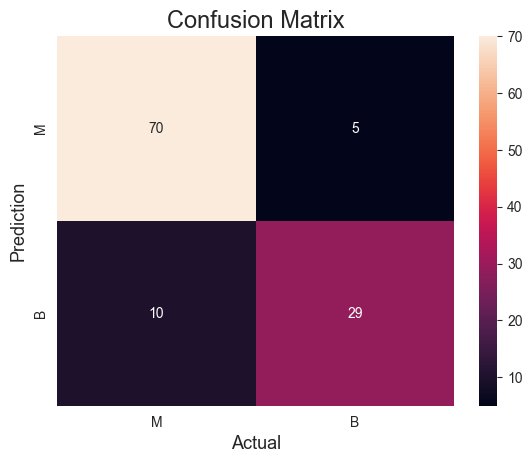

Accuracy: 0.868421052631579
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129


In [13]:
clf = LogisticRegression(penalty=None)

clf.fit(xtr,ytr)
pred = clf.predict(xte)
print (f'Training Accuracy - : {clf.score(xtr,ytr)}')
print (f'Testing Accuracy - : {clf.score(xte,yte)}')
cm_without_C = confusion_matrix(pred,yte)

 
sns.heatmap(cm_without_C,
            annot=True,
            fmt='g',
            xticklabels=['M', 'B'],
            yticklabels=['M', 'B'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

tp = cm_without_C[0][0]
fp = cm_without_C[0][1]
fn = cm_without_C[1][0]
tn = cm_without_C[1][1]

#print(tp,fp,fn,tn)
# Calculate metrics
accuracy = (tp + tn) / np.sum(cm_without_C)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Note the difference in performance metrics

# Effect of hyperparameter 'C'

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.¶


Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.


Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data

# Estimating Optimal Value of 'C' Parameter

## Understanding which values for 'C' are the best to use.

A valid question to raise is, which C values must we then use?


There is a way to check which C values are best. The idea is to understand how each C value affects the accuracy of the training set and the testing set. Remember that our goal is always to create a model that can generalise to unseen data.


The way to do this is to plot validation curves.

## So, which C do we use?¶

The idea is to choose that C which offers the smallest difference between the training and testing accuracy. It can be done by many approaches like GridSearch, RandomSearch, Validation Curve and so on. Let us try to optimize it using Brute Force Method.

## Using Brute Force Method

Using brute force method by providing a range of values for 'C'. At each iteration, one value from the range is picked up, a model is trained and it's metrics are stored. 

After completion of all iterations, we compare the training and testing accuracies for each value of 'C' and calculate the value whose difference is minimum.


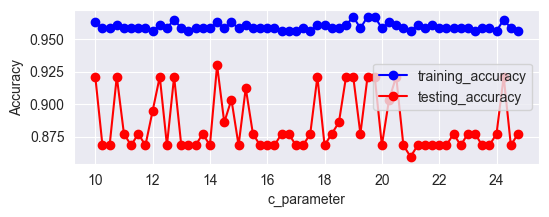

The miThe minimum difference in training and testing scores is at C =  19.25nimum difference in training and testing scores is at C =  14.25


In [15]:
c = np.arange(10,25,0.25)
train_acc = []
test_acc = []
for i in c:
    clf = LogisticRegression(penalty = 'l2', C = i)
    
    clf.fit(xtr,ytr)
    pred = clf.predict(xte)
    train_acc.append(clf.score(xtr,ytr))
    test_acc.append(accuracy_score(pred, yte))
    
plt.figure(figsize=(6,2))
plt.plot(c,train_acc, marker = 'o', color = 'b',label='training_accuracy')      
plt.plot(c,test_acc, marker = 'o', color = 'r',label='testing_accuracy')
plt.xlabel('c_parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


diff = np.array(train_acc) - np.array(test_acc)
min_idx = np.argmin(diff)
print("The miThe minimum difference in training and testing scores is at C =  19.25nimum difference in training and testing scores is at C = ",c[min_idx])

Using the estimated value of 'C' to fit a model and evaluate it's metrics.

Training Accuracy - : 0.9626373626373627
Testing Accuracy - : 0.9298245614035088


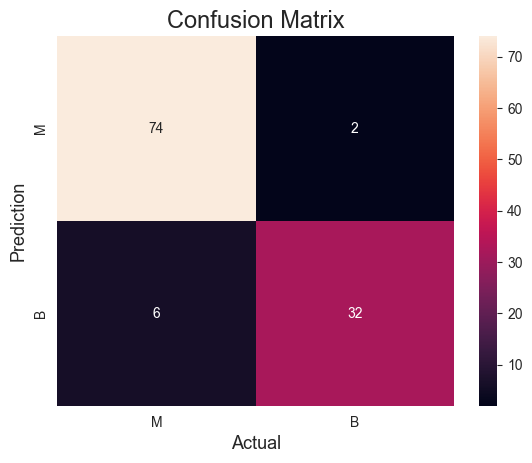

Accuracy: 0.9298245614035088
Precision: 0.9736842105263158
Recall: 0.925
F1 Score: 0.9487179487179489


In [16]:
clf = LogisticRegression(penalty = 'l2', C = c[min_idx])
clf.fit(xtr,ytr)
pred = clf.predict(xte)
print (f'Training Accuracy - : {clf.score(xtr,ytr)}')
print (f'Testing Accuracy - : {clf.score(xte,yte)}')
cm_with_optimal_C = confusion_matrix(pred,yte)

 
sns.heatmap(cm_with_optimal_C,
            annot=True,
            fmt='g',
            xticklabels=['M', 'B'],
            yticklabels=['M', 'B'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

tp = cm_with_optimal_C[0][0]
fp = cm_with_optimal_C[0][1]
fn = cm_with_optimal_C[1][0]
tn = cm_with_optimal_C[1][1]

#print(tp,fp,fn,tn)
# Calculate metrics
accuracy = (tp + tn) / np.sum(cm_with_optimal_C)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)